In [1]:
import sys
import os
import streamlit as st
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import tempfile
import sqlite3
import numpy as np

from budget_functions import *

# # Was hoping to put the site online...
# script_directory = os.path.dirname(os.path.abspath(__file__))
# # Add the project root directory to sys.path
# project_root_directory = os.path.join(script_directory, '..')
# sys.path.append(project_root_directory)


In [2]:
master = create_master("raw_data/clevmoney_102423_125727_auto.db")


In [3]:
master


,s_date,s_time,s_where,s_cate,s_subcate,s_price,Month,Year
0,2022-05-02,15:13:00,Tesco,Groceries,Tesco,9.70,5,2022
1,2022-05-02,15:14:00,Santander,Transportation,Bicycle,90.00,5,2022
2,2022-05-03,15:37:00,Tesco,Food,Snacks,3.20,5,2022
3,2022-05-03,22:19:00,RyanAir (Amsterdam),Holidays,Flights,90.82,5,2022
4,2022-05-03,22:19:00,EasyJet (Poland),Holidays,Flights,126.66,5,2022
...,...,...,...,...,...,...,...,...
1669,2023-10-21,15:50:00,Runners Needs,Shopping,Clothes,29.99,10,2023
1670,2023-10-21,15:53:00,Sainsbury,Groceries,Sainsbury,13.20,10,2023
1671,2023-10-21,19:03:00,Runners Needs,Shopping,Clothes,180.00,10,2023
1672,2023-10-21,00:00:00,Roman Road,Groceries,Roman Road,1.74,10,2023


In [4]:
raw_avg, len_of_time = mnth_avg(master)
m_average = raw_avg.to_frame().reset_index().sort_values('s_price', ascending=False)


/var/folders/62/d7t21rj54ls65fhypjm4ryb00000gn/T/ipykernel_23597/655379111.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('rainbow')


Text(0.5, 1.0, 'Average spend over 20 months')

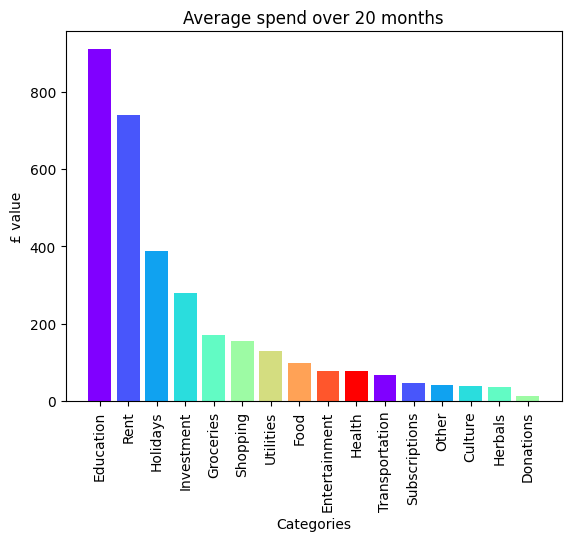

In [5]:
norm = plt.Normalize(0.5, 0.75)

x = np.arange(10)
y = np.random.rand(10)

cmap = plt.cm.get_cmap('rainbow')

plt.bar(m_average['s_cate'], m_average['s_price'], color=cmap(np.linspace(0, 1, len(x))))
plt.xlabel("Categories")
plt.xticks(rotation=90)
plt.ylabel('£ value')
plt.title(f"Average spend over {len_of_time} months")


In [73]:
sort = master.groupby(['Year', 'Month', 's_cate'])['s_price'].sum()

test_df = pd.DataFrame(sort).reset_index()
test_df['YearMonth'] = test_df['Year'].astype(str) + '-' + test_df['Month'].astype(str)
test_df['YearMonth'] = pd.to_datetime(test_df['YearMonth'])
test_df.set_index('YearMonth', inplace=True)

pivot_table = test_df.pivot_table(index=test_df.index, columns='s_cate', values='s_price')
pivot_table.fillna(0, inplace=True)
pd.DataFrame(pivot_table.mean().sort_values(ascending=False)).reset_index()


,s_cate,0
0,Rent,739.3965
1,Education,409.7210
2,Holidays,349.8085
3,Groceries,170.0360
4,Investment,153.9000
5,Shopping,139.3685
6,Food,99.3375
7,Entertainment,77.4270
8,Health,76.9855
9,Transportation,66.3115


# Next things to do

1. Add weekly spend overlay to the Monthly totals graph - perhaps do this as violin plots? Kinda like crypto graphs
2. Be able to create your own categories
3. Be able to look into sub categories
